In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# data
nsm = np.random.RandomState(2019)
start_x = -10
end_x = 10
step_x = 0.1
X = np.arange(start_x,end_x,step_x)    
Y = -5 * X**3 + 2 * X **2 + 0.5 *X - 5
Y = Y + nsm.uniform(-200,200,(int((end_x-start_x)/step_x)))

ymax = np.max(Y)
ymin = np.min(Y)
range_value = max(abs(ymax),abs(ymin))   #将Y映射到-1,1区间，使得模型能够更快的收敛，防止梯度消失
print(ymax)
print(ymin)
print(range_value)

5351.39288576771
-4580.811325138131
5351.39288576771


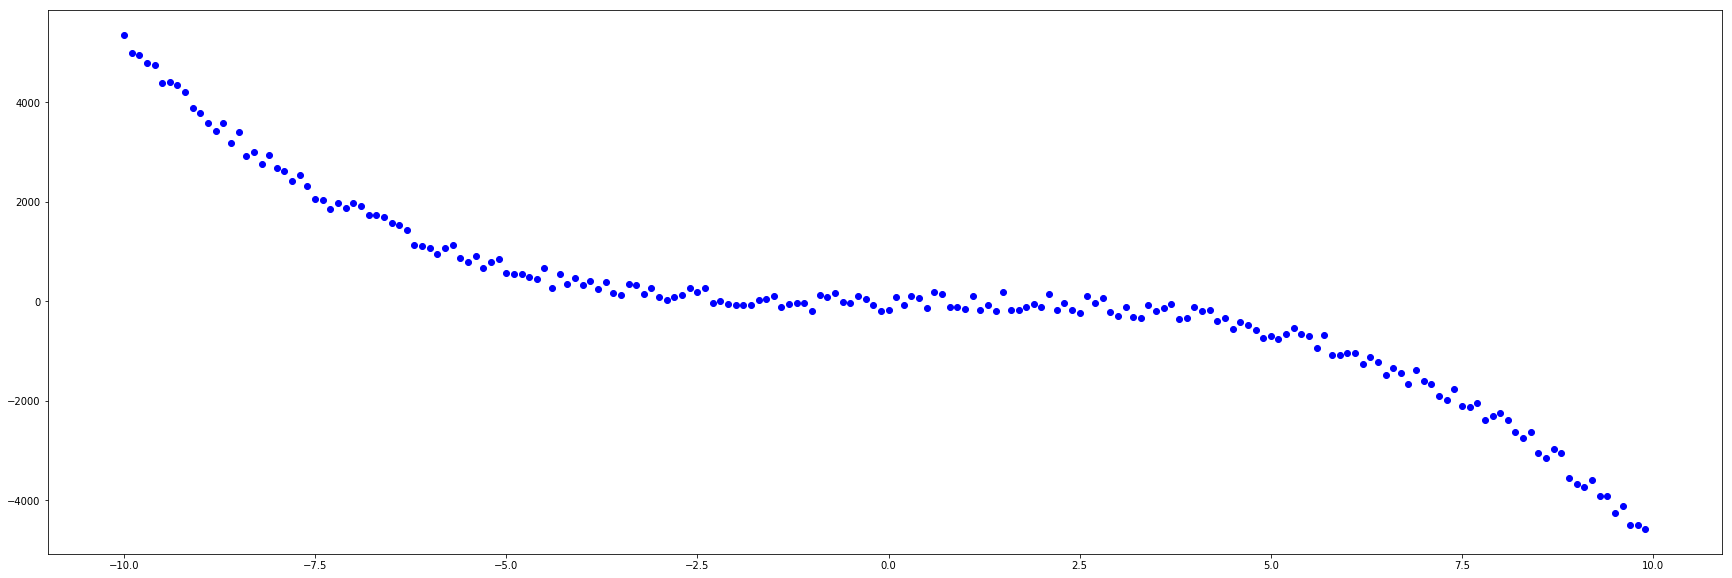

In [3]:
plt.figure(figsize=(30,10))
plt.scatter(X,Y,c='b')
plt.show()

In [4]:
#net
network = Sequential()
network.add(Dense(10,tf.nn.tanh,input_shape=(1,)))
network.add(Dense(1,tf.nn.tanh))

network.compile(loss=tf.losses.mean_squared_error,optimizer=tf.keras.optimizers.Adam())

# train 
EPOCH = 20000
for epoch in range(EPOCH):
    loss = network.train_on_batch(X,Y/range_value)
    if epoch % 1000 == 0:
        print("[{}/{}]   loss = {}".format(epoch,EPOCH,loss))
        
#Print W and B
# W,B = network.layers[0].get_weights()
# print("W = ",W,"   B = ",B)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[0/20000]   loss = 0.4627518355846405
[1000/20000]   loss = 0.006098871119320393
[2000/20000]   loss = 0.0029392288997769356
[3000/20000]   loss = 0.0017779091140255332
[4000/20000]   loss = 0.0012675418984144926
[5000/20000]   loss = 0.000991182285360992
[6000/20000]   loss = 0.0008350700954906642
[7000/20000]   loss = 0.0007288401830010116
[8000/20000]   loss = 0.000648778397589922
[9000/20000]   loss = 0.000591576099395752
[10000/20000]   loss = 0.0005484587163664401
[11000/20000]   loss = 0.000516230589710176
[12000/20000]   loss = 0.0004978504148311913
[13000/20000]   loss = 0.0004891342832706869
[14000/20000]   loss = 0.0004845460643991828
[15000/20000]   loss = 0.0004818225570488721
[16000/20000]   loss = 0.0004800556635018438
[17000/20000]   loss = 0.0004788265796378255
[18000/20000]   loss = 0.00047793801059015095
[19000/20000]   loss = 0.0004772561660502106


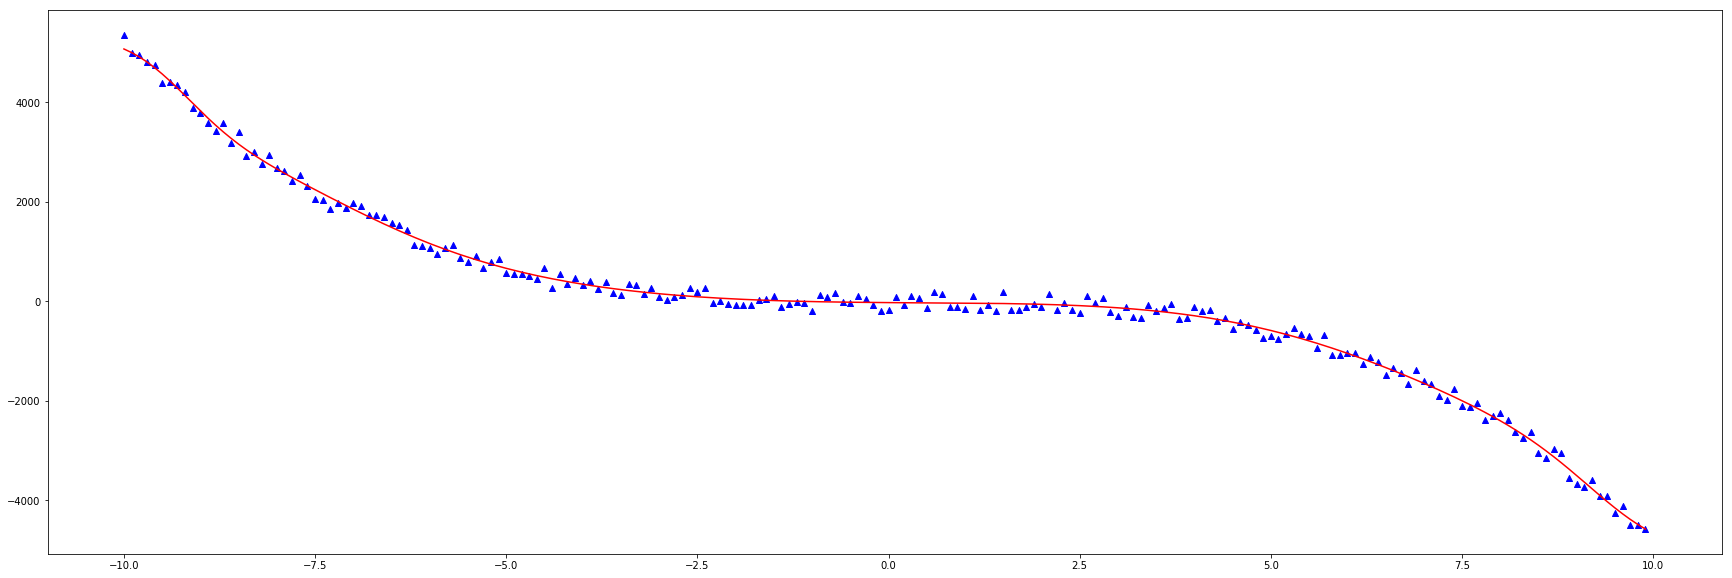

In [5]:
plt.figure(figsize=(30,10))
offset_scale = 1
test_X = np.arange(start_x*offset_scale,end_x*offset_scale,step_x)    
Y_predict = network.predict(test_X) * range_value
plt.scatter(X,Y,c="b",marker='^')
plt.plot(test_X,Y_predict,"r-")
plt.show()